<a href="https://colab.research.google.com/github/Nelkit/36103-AT2-data-analysis-project/blob/nelkit/36103_AT2B_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment task 2: Data analysis project




## 📝 TODO List

✅ Project Overview  
- [ ] **1.1 Project Description**  
- [ ] **1.2 Business Objective**  
- [ ] **1.3 Research Questions**  

📥 Data Loading and Understanding  
- [x] ~~Load the dataset~~  
- [x] ~~Check for missing values and duplicates~~  
- [x] ~~Understand data types and structure~~  

📊 Exploratory Data Analysis (EDA)  
- [x] ~~3.1 Explore features~~
- [x] ~~3.2 Explore target variable~~
- [x] ~~Visualize distributions, correlations, and patterns~~

🎯 Feature Selection  
- [ ] **4.1 Feature Selection Approach** (correlation, importance scores, etc.)  
- [ ] **4.2 Final Selected Features**  

🛠 Data Preprocessing  
- [ ] **5.1 Data Cleaning** (handle missing values, outliers, duplicates)  
- [ ] **5.2 Feature Engineering** (create new features, transformations)  
- [ ] **5.3 Data Transformation** (scaling, encoding, normalization)  

🤖 Data Modeling  
- [ ] **6.1 Generate Predictions with Baseline Model**  
- [ ] **6.2 Assess the Baseline Model**  

📈 Model Evaluation  
- [ ] **7.1 Generate Predictions with Model Selected**  
- [ ] **7.2 Assess the Selected Model** (metrics, performance comparison)  

🔍 Insights and Conclusions  
- [ ] Summarize key findings  
- [ ] Discuss model performance and business impact  
- [ ] Identify limitations and potential improvements


## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36103"
ASSIGNMENT = "AT2"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}



###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36103/assignment/AT2/data
/content/gdrive/MyDrive/36103/assignment/AT2/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [3]:
!pip install scipy

### 0.d Import Packages

In [4]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec

### 0.f Reusable Functions

In [58]:
def plotting_num_feature_distributions(data, col, color = '#F9B123', dataset_name="", width=10, height=4):
  col_name = col.capitalize()
  # 1. Summary Statistics
  summary_stats = data[col].describe()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  print(summary_stats)

  fig = plt.figure(figsize=(width, height))
  gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])

  # 2. Boxplot and Histogram plot
  ax_box = plt.subplot(gs[0, 0])
  sns.boxplot(x=data[col], ax=ax_box, color=color)
  ax_box.set(title=f'Boxplot and Histogram of {col_name} in {dataset_name}')
  ax_box.set(xlabel='')
  ax_box.set_xticklabels([])

  ax_hist = plt.subplot(gs[1, 0])
  sns.histplot(data, x=col, ax=ax_hist, color=color, bins=30, kde=False)
  ax_box.set_xlim(ax_hist.get_xlim())

  # 3. QQ plot
  ax_qq = plt.subplot(gs[:, 1])
  stats.probplot(data[col], dist="norm", plot=ax_qq)
  ax_qq.set_title(f'QQ Plot of {col_name} in {dataset_name}')

  plt.tight_layout()
  plt.show()

def plotting_cat_feature_distributions(data, col, dataset_name = ""):
  col_name = col.capitalize()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  summary_stats = data[col].describe()
  print(summary_stats)

  target_count = data[col].value_counts()
  sizes = target_count.values
  total_records = len(data[col])
  category_order = target_count.index

  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=col, hue=col, palette="Set1", order=category_order)
  plt.title(f"Distribution of {col_name} in {dataset_name}")
  for s, value in enumerate(sizes):
      percentage = (value / total_records) * 100
      percentage = round(percentage, 2)
      plt.text(s, value, f'{value} \n ({percentage}%)', color="#333", ha='center', va='bottom', fontsize=10, weight="bold")

  plt.xlabel(col_name)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha='right')
  plt.show()

def get_corr_of_predictors(method, data, predictors_names, width=6, height=5):
  continuous_data = data[predictors_names]

  correlation_matrix = continuous_data.corr(method=method)
  plt.figure(figsize=(width, height))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Correlation Matrix of Predictors using {method.capitalize()} method')
  plt.show()

  return correlation_matrix

def check_duplicates(data):
    duplicates = data.duplicated()
    duplicates_count = duplicates.sum()
    total_records = len(data)
    percentage_duplicates = (duplicates_count / total_records) * 100
    percentage_duplicates = round(percentage_duplicates, 2)

    print(f'There are {duplicates_count} of {total_records} ({percentage_duplicates})% duplicates rows')
    return duplicates

def check_missing_values(data):
    missing_counts = data.isnull().sum()
    total_records = len(data)
    missing_summary = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if missing_summary.empty:
        print("There are no missing values in the dataset.")
    else:
        print("Missing values per column:")
        for column, count in missing_summary.items():
            percentage = (count / total_records) * 100
            print(f"- {column}: {count} missing ({round(percentage, 2)}%)")

    return data.isnull()


## 1. Project Overview

### 1.1 Project Description

`Type your project decription here`

### 1.2 Business Objective

`Type your business objective here`

### 1.3 Research Questions

`Type your research Questions here`

## 2. Data Loading and Understanding

In [5]:
original_df = pd.read_csv(folder_path / "UCI_Credit_Card.csv")

## 3. Exploratory Data Analysis (EDA)

### 3.1 Explore features

In [6]:
original_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
original_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [31]:
num_cols = list(original_df.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
target_col = 'default.payment.next.month'

# Remove categorical columns from num_cols
num_cols = [col for col in num_cols if col not in cat_cols + ['ID', target_col]]

print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)
print("\nTarget column:")
print(target_col)

Numerical columns:
['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Categorical columns:
['SEX', 'EDUCATION', 'MARRIAGE']

Target column:
default.payment.next.month


Summary Statistics of Limit_bal in Original:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


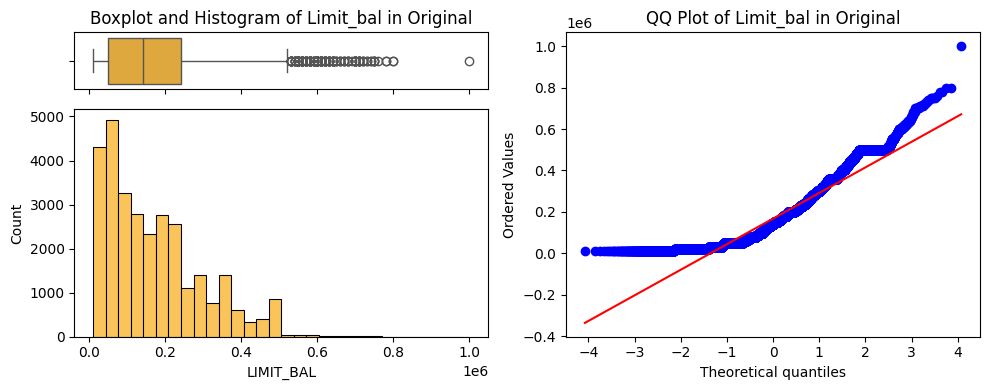

Summary Statistics of Age in Original:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


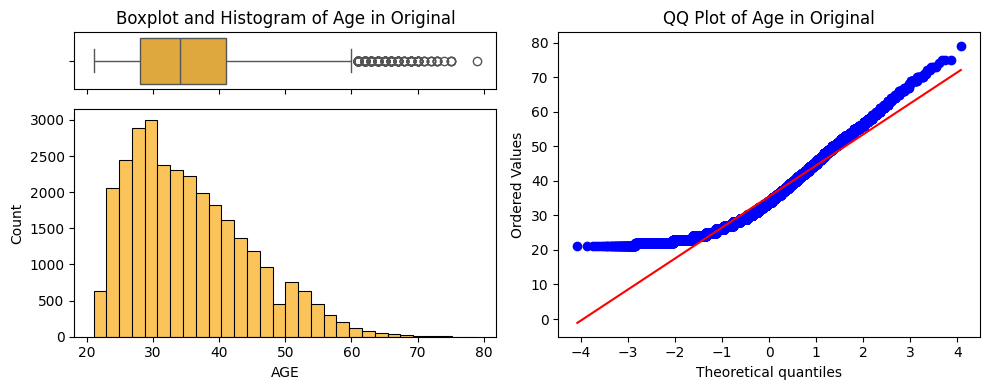

Summary Statistics of Pay_0 in Original:
count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64


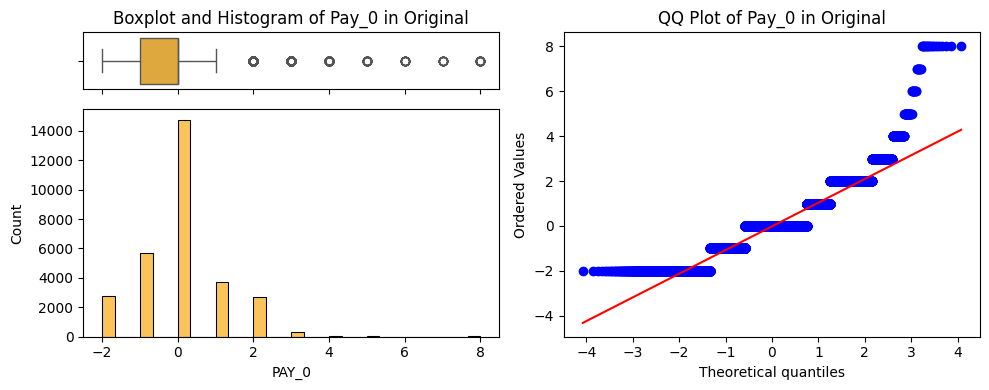

Summary Statistics of Pay_2 in Original:
count    30000.000000
mean        -0.133767
std          1.197186
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_2, dtype: float64


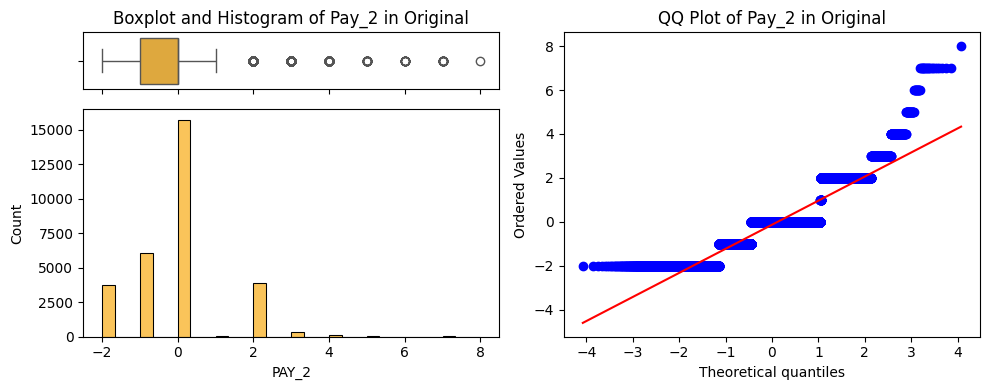

Summary Statistics of Pay_3 in Original:
count    30000.000000
mean        -0.166200
std          1.196868
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_3, dtype: float64


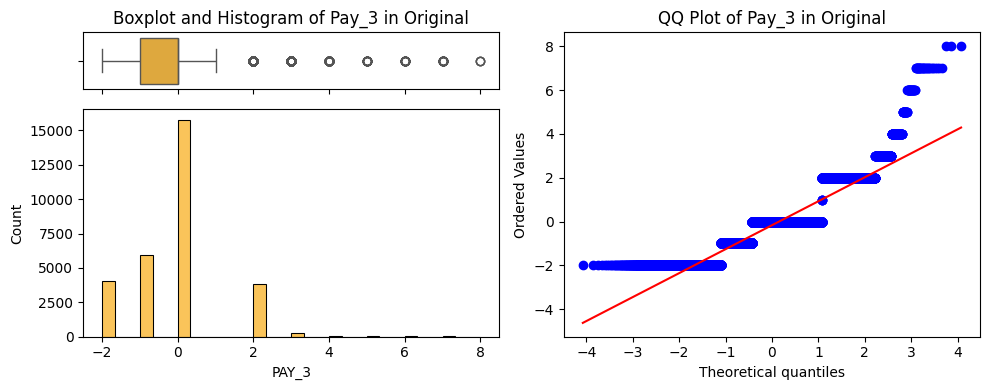

Summary Statistics of Pay_4 in Original:
count    30000.000000
mean        -0.220667
std          1.169139
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_4, dtype: float64


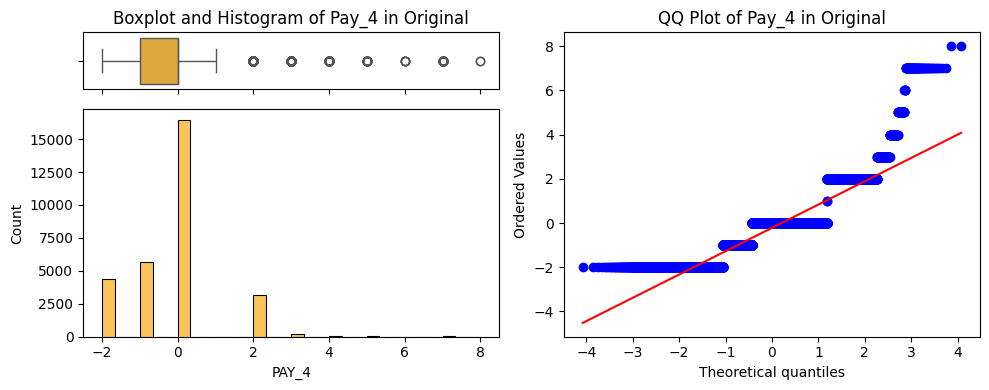

Summary Statistics of Pay_5 in Original:
count    30000.000000
mean        -0.266200
std          1.133187
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_5, dtype: float64


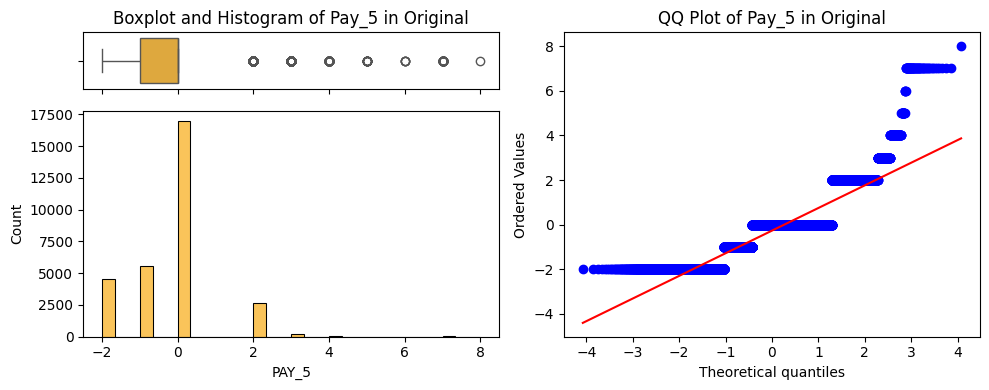

Summary Statistics of Pay_6 in Original:
count    30000.000000
mean        -0.291100
std          1.149988
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_6, dtype: float64


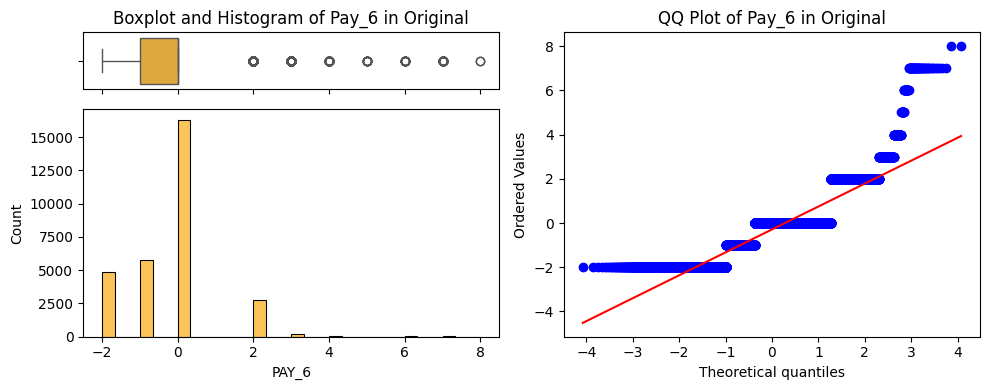

Summary Statistics of Bill_amt1 in Original:
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


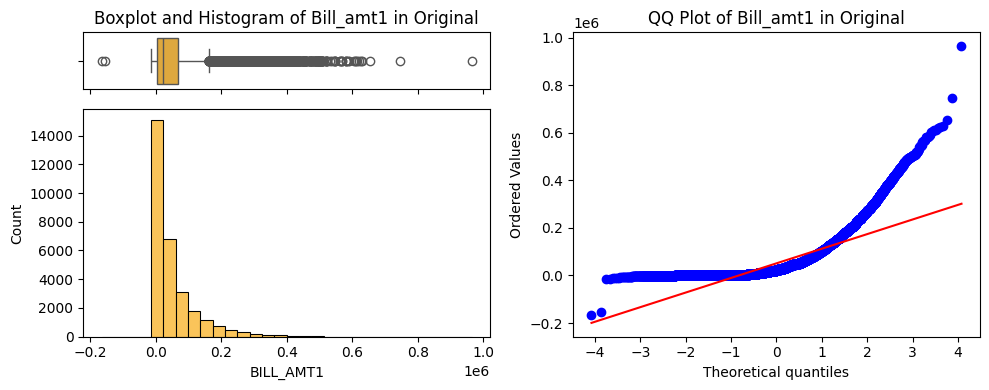

Summary Statistics of Bill_amt2 in Original:
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64


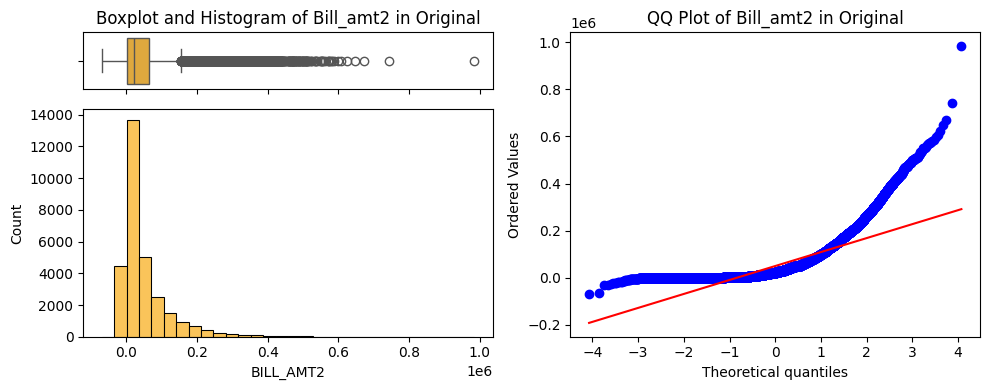

Summary Statistics of Bill_amt3 in Original:
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64


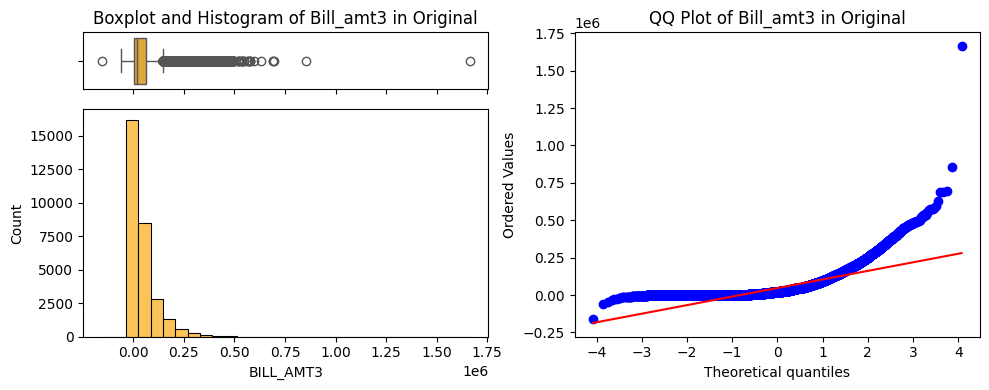

Summary Statistics of Bill_amt4 in Original:
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64


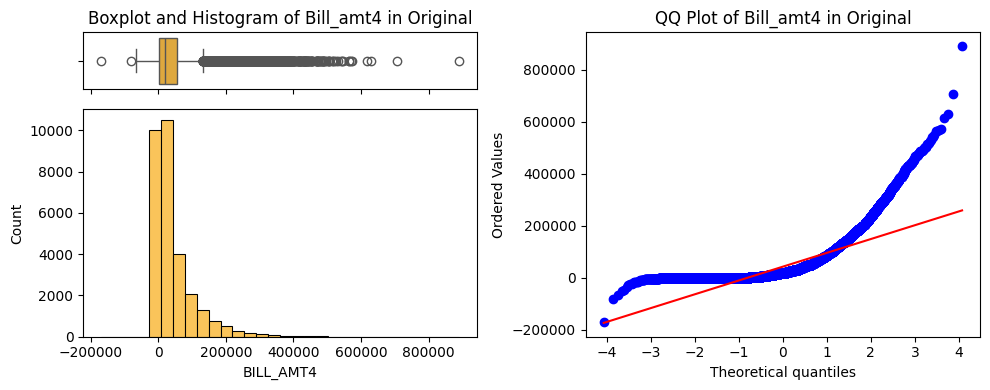

Summary Statistics of Bill_amt5 in Original:
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64


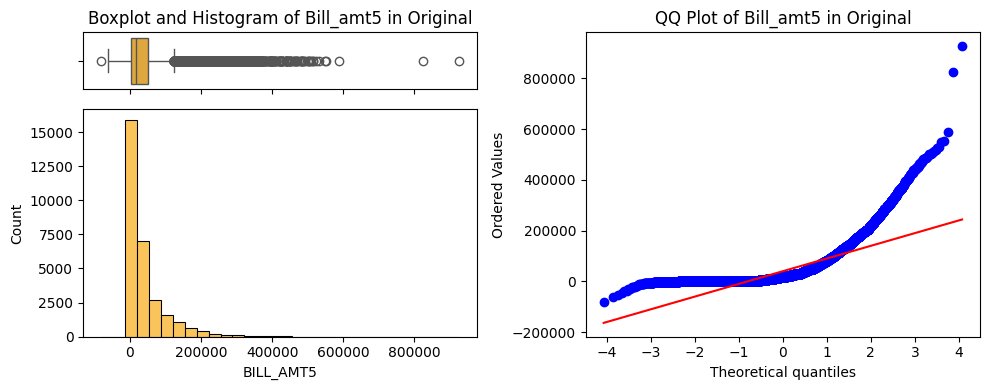

Summary Statistics of Bill_amt6 in Original:
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64


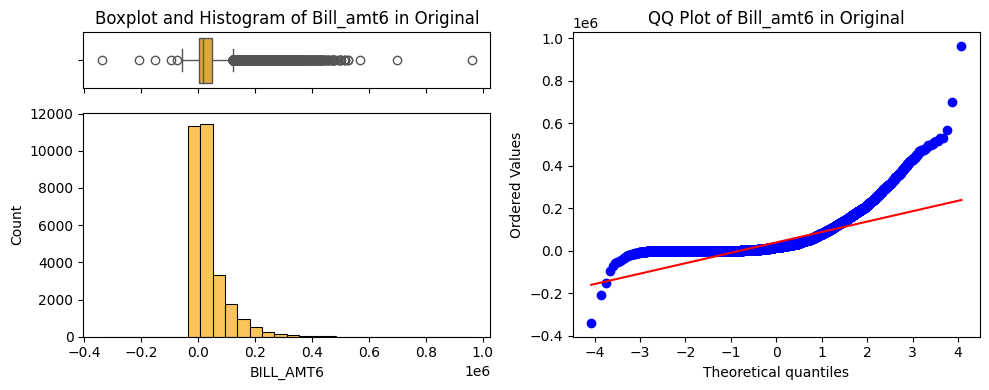

Summary Statistics of Pay_amt1 in Original:
count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


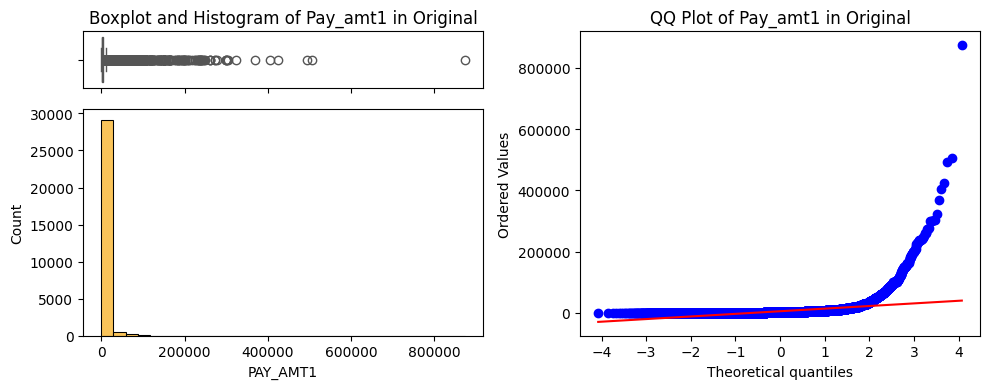

Summary Statistics of Pay_amt2 in Original:
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


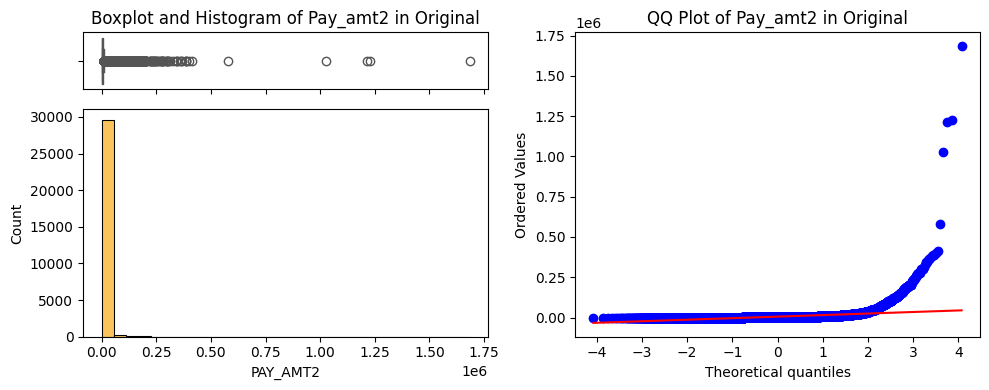

Summary Statistics of Pay_amt3 in Original:
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64


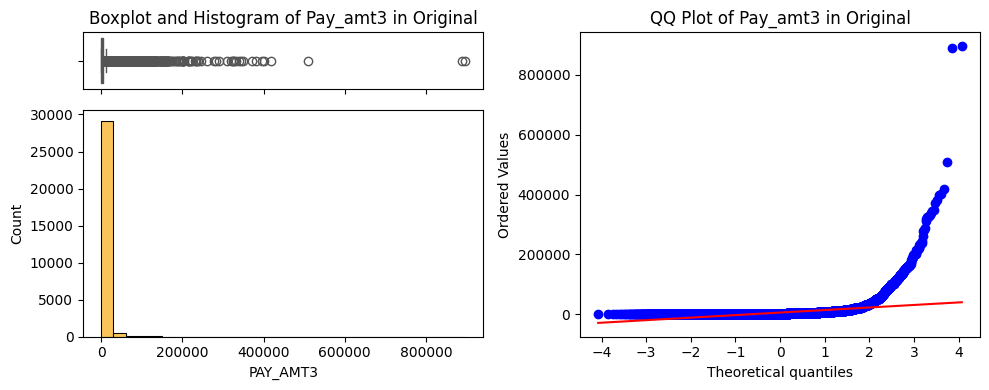

Summary Statistics of Pay_amt4 in Original:
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64


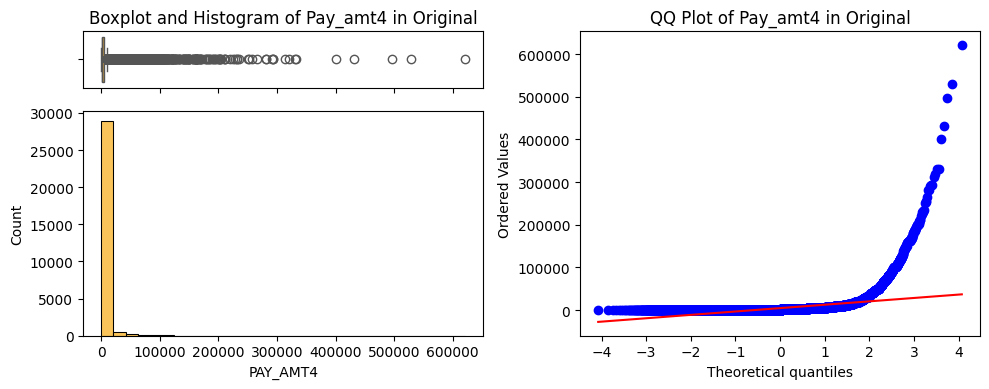

Summary Statistics of Pay_amt5 in Original:
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64


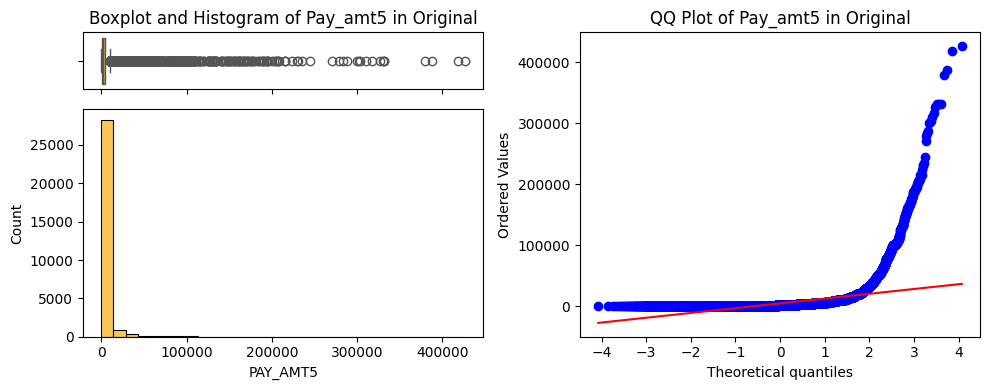

Summary Statistics of Pay_amt6 in Original:
count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64


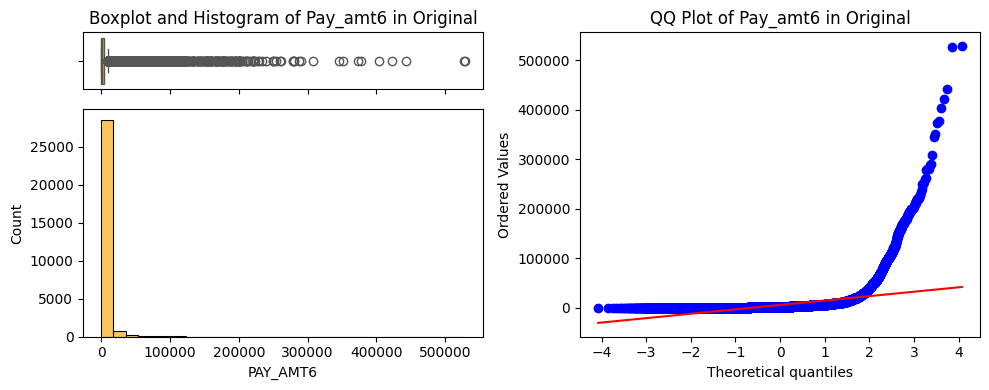

In [32]:
for col in num_cols:
  plotting_num_feature_distributions(original_df, col, dataset_name="Original")

Summary Statistics of Sex in Original:
count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64


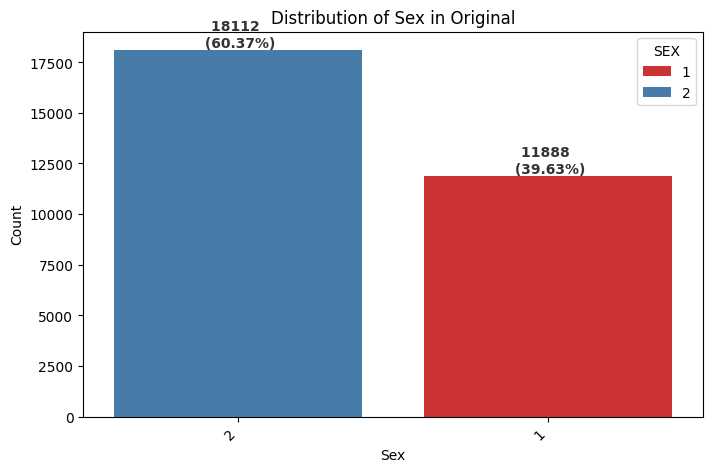

Summary Statistics of Education in Original:
count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64


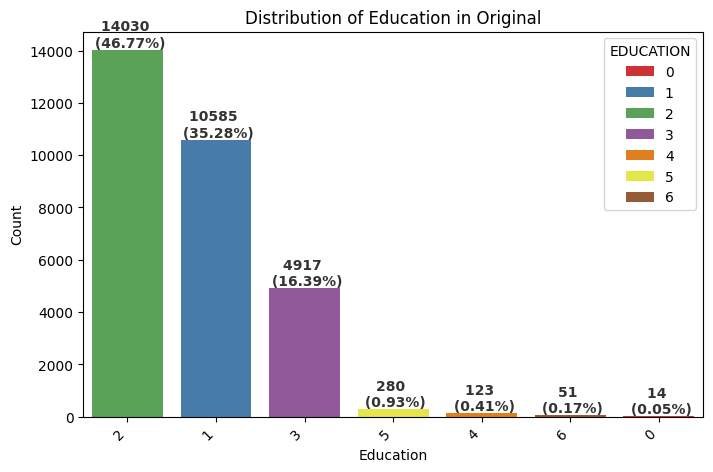

Summary Statistics of Marriage in Original:
count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64


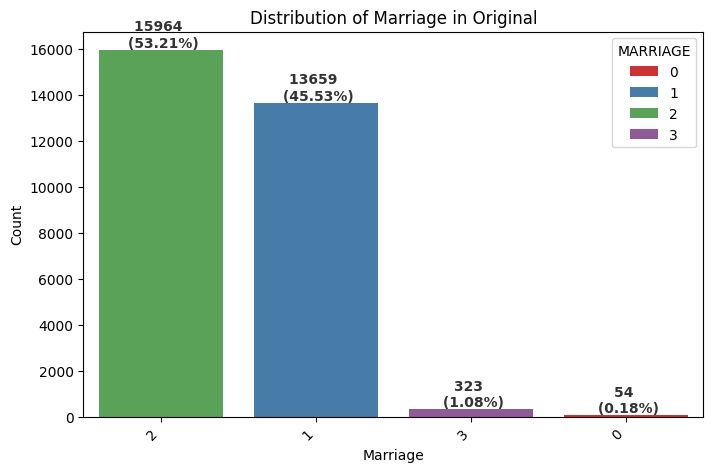

In [33]:
for col in cat_cols:
  plotting_cat_feature_distributions(original_df, col, dataset_name="Original")

### 3.2 Explore target variable

Summary Statistics of Default.payment.next.month in Original:
count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64


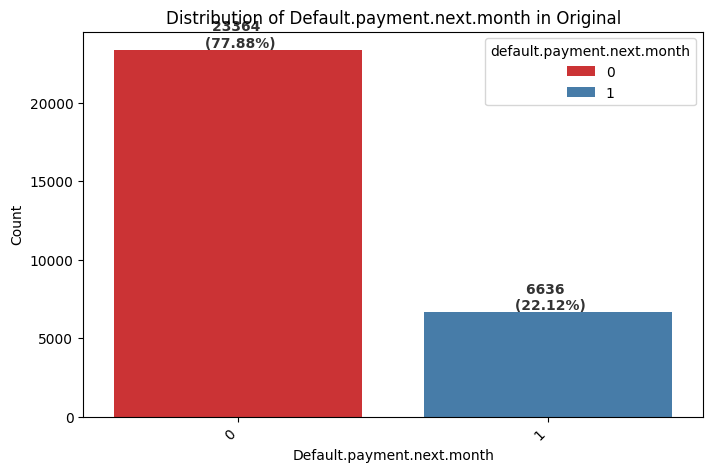

In [34]:
plotting_cat_feature_distributions(original_df, target_col, dataset_name="Original")

### 3.3 Explore duplicates and missing values

#### 3.3.1 Duplicates

In [57]:
check_duplicates(original_df)

There are 0 of 30000 (0.0)% duplicates rows


,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


#### 3.3.2 Missing Values

In [59]:
check_missing_values(original_df)

There are no missing values in the dataset.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 4. Feature Selection

### 4.1 Feature Selection Approach

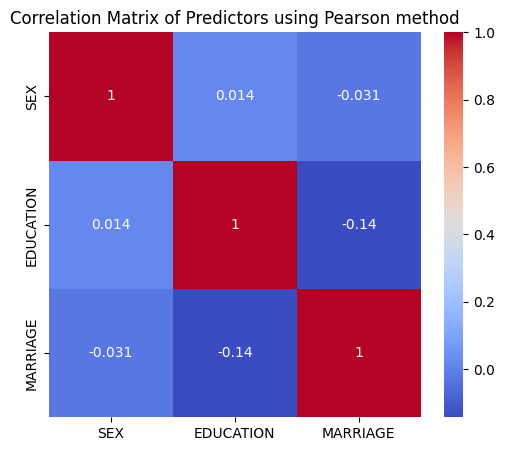

In [49]:
correlation = get_corr_of_predictors('pearson', original_df, cat_cols)

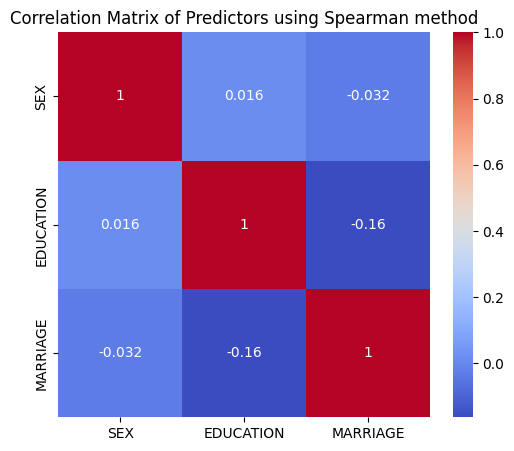

,SEX,EDUCATION,MARRIAGE
SEX,1.000000,0.015616,-0.031535
EDUCATION,0.015616,1.000000,-0.162415
MARRIAGE,-0.031535,-0.162415,1.000000


In [50]:
get_corr_of_predictors('spearman', original_df, cat_cols)

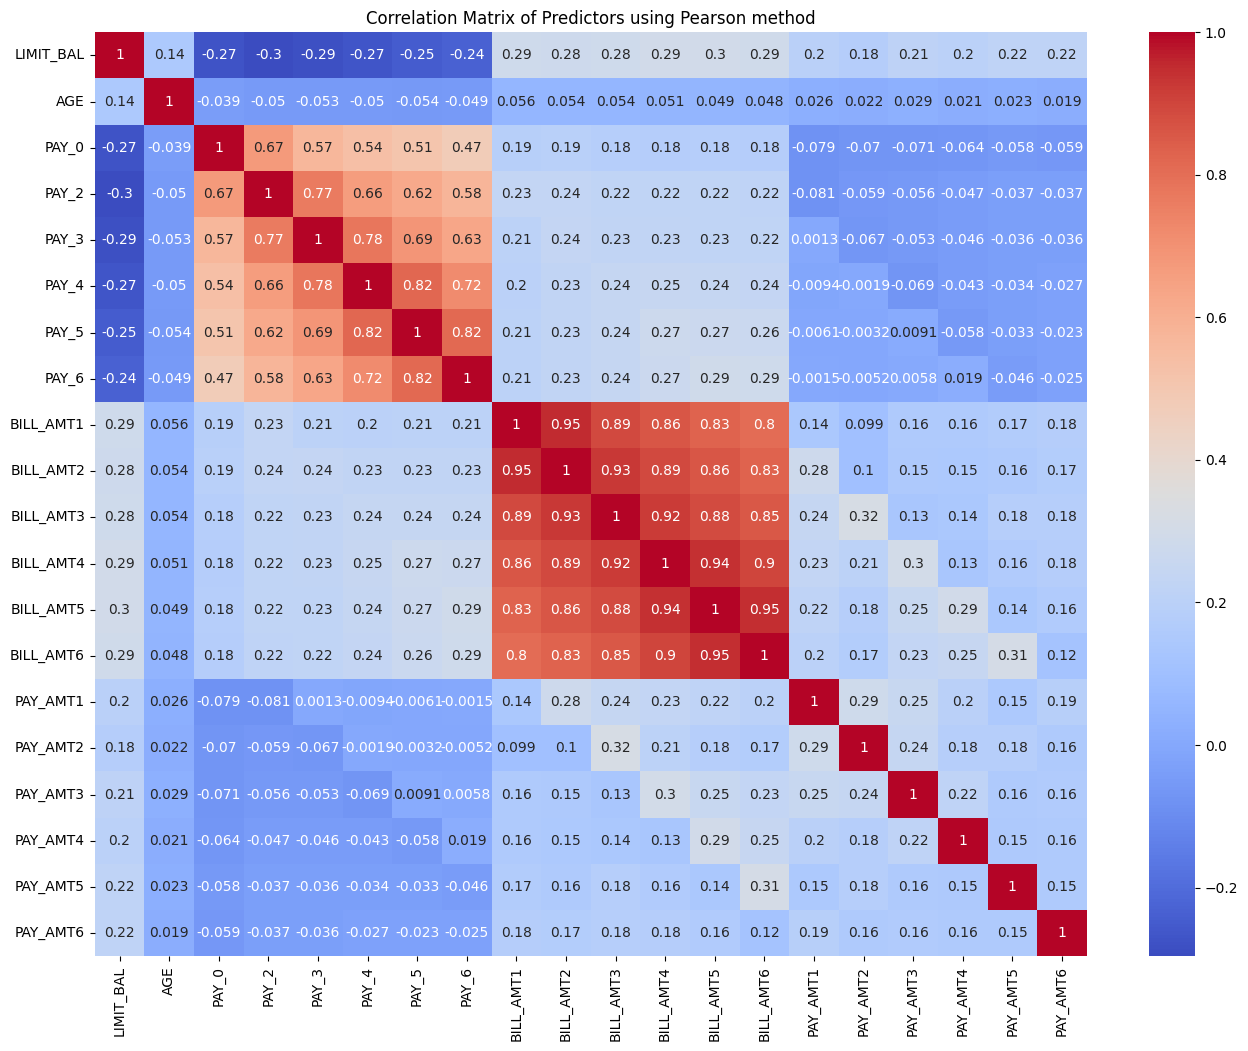

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256


In [51]:
get_corr_of_predictors('pearson', original_df, num_cols, 16, 12)

### 4.2 Final Selected Features

## 5. Data Preprocessing

### 5.1 Data Cleaning

### 5.2. Feature Engineering

### 5.3 Data Transformation

## 6. Data Modeling

### 6.1 Generate Predictions with Baseline Model

### 6.2 Assess the Baseline Model

## 7. Model Evaluation

### 7.1 Generate Predictions with Model Selected

### 7.2 Assess the Selected Model

## 8. Insights and Conclusions